In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1=pd.read_csv('/content/sample_data/energydata_complete.csv')
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

SIMPLE LINEAR REGRESSION Question 12

In [8]:
X=df1['T2']
Y=df1['T6']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


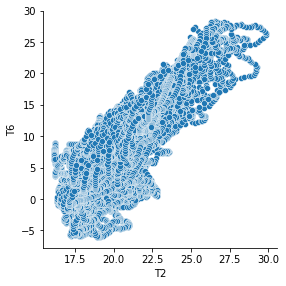

In [10]:
sns.pairplot(df1,x_vars=['T2'], 
             y_vars='T6', size=4, aspect=1, kind='scatter')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 0)

In [22]:
X_train


3766     22.323333
9503     21.000000
10946    21.356667
10393    20.790000
15274    19.760000
           ...    
13123    21.600000
19648    22.390000
9845     19.000000
10799    20.790000
2732     20.600000
Name: T2, Length: 13814, dtype: float64

In [23]:
y_train

3766     10.033333
9503     10.426667
10946    12.793333
10393     7.866667
15274     6.466667
           ...    
13123    13.660000
19648    13.600000
9845      5.656667
10799    15.030000
2732      5.900000
Name: T6, Length: 13814, dtype: float64

In [24]:
import statsmodels.api as sm


In [25]:
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const   -37.274535
T2        2.220901
dtype: float64

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     T6   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 2.414e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:53:23   Log-Likelihood:                -37522.
No. Observations:               13814   AIC:                         7.505e+04
Df Residuals:                   13812   BIC:                         7.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.2745      0.292   -127.559      0.000     -37.847     -36.702
T2             2.2209      0.014    155.385      0.000       2.193       2.249
==============================================================================
Omnibus:                      584.264   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.782
Skew:                          -0.508   Prob(JB):                    1.62e-145
Kurtosis:                       3.355   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 13

In [99]:
from sklearn.preprocessing import MinMaxScaler
#df1.drop('date',axis='columns',inplace=True)
df1.drop('lights',axis='columns',inplace=True)

KeyError: ignored

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [101]:
scaler=MinMaxScaler()
scaled = scaler.fit_transform(df1)
print(scaled)

[[0.04672897 0.32734952 0.56618659 ... 0.53846154 0.26544891 0.26544891]
 [0.04672897 0.32734952 0.54132648 ... 0.53393665 0.37208289 0.37208289]
 [0.03738318 0.32734952 0.53050179 ... 0.52941176 0.57284766 0.57284766]
 ...
 [0.24299065 0.91974657 0.53866618 ... 0.89894419 0.58397859 0.58397859]
 [0.38317757 0.91974657 0.54949087 ... 0.8974359  0.12637146 0.12637146]
 [0.39252336 0.91974657 0.53875791 ... 0.8959276  0.68239057 0.68239057]]


In [102]:
X=df1.loc[:, df1.columns != 'Appliances']
y=df1['Appliances']
X.shape


(19735, 26)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 42)

In [104]:
X_train.shape

(13814, 26)

In [105]:
y_train.shape

(13814,)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [108]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 45.50160253, 271.27860032,  46.38676919, ...,  83.18945098,
       117.34584427,  71.26902639])

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [110]:
mean_absolute_error(y_test,y_prediction)

53.64493371049581

In [111]:
np.sqrt(mean_squared_error(y_test,y_prediction))

93.63995652963847

In [112]:
score=r2_score(y_test,y_prediction)
score

0.1489116323329327

In [114]:
X_train_sm = sm.add_constant(X_train)
model1=sm.OLS(y_train,X_train_sm).fit()
model1.ssr

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


125238026.26523331

In [81]:
importance = LR.coef_
LR

LinearRegression()

In [77]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.37072
Feature: 1, Score: 16.30804
Feature: 2, Score: -18.36732
Feature: 3, Score: -13.74263
Feature: 4, Score: 25.83918
Feature: 5, Score: 4.79880
Feature: 6, Score: 2.79643
Feature: 7, Score: 1.20114
Feature: 8, Score: -1.60320
Feature: 9, Score: 0.25798
Feature: 10, Score: 7.36145
Feature: 11, Score: 0.41205
Feature: 12, Score: 1.03766
Feature: 13, Score: -1.69305
Feature: 14, Score: 9.99432
Feature: 15, Score: -5.78250
Feature: 16, Score: -21.15543
Feature: 17, Score: -1.75915
Feature: 18, Score: -11.06870
Feature: 19, Score: 0.17045
Feature: 20, Score: -1.09299
Feature: 21, Score: 2.23352
Feature: 22, Score: 0.20213
Feature: 23, Score: 5.70042
Feature: 24, Score: -6568853433424.28418
Feature: 25, Score: 6568853433424.31543


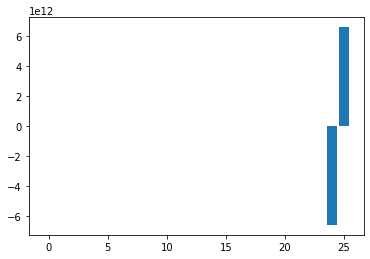

Question 18

In [83]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.4)

In [85]:
model.fit(X_train, y_train)

Ridge(alpha=0.4)

In [87]:
y_prediction =  model.predict(X_test)
y_prediction

array([ 45.54857692, 271.19847813,  46.38091532, ...,  83.23942456,
       117.34695099,  71.23019955])

In [88]:
np.sqrt(mean_squared_error(y_test,y_prediction))

93.64050398701558

In [90]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_prediction =  model.predict(X_test)
y_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.136e+06, tolerance: 1.464e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 45.54553366, 271.20891998,  46.38120103, ...,  83.23743594,
       117.34382583,  71.23126146])

In [91]:
np.sqrt(mean_squared_error(y_test,y_prediction))

93.64047772243322

In [92]:
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.36651
Feature: 1, Score: 16.29967
Feature: 2, Score: -18.36318
Feature: 3, Score: -13.73723
Feature: 4, Score: 25.83110
Feature: 5, Score: 4.80205
Feature: 6, Score: 2.78872
Feature: 7, Score: 1.20290
Feature: 8, Score: -1.60161
Feature: 9, Score: 0.25754
Feature: 10, Score: 7.36033
Feature: 11, Score: 0.41145
Feature: 12, Score: 1.03439
Feature: 13, Score: -1.69194
Feature: 14, Score: 9.98826
Feature: 15, Score: -5.77898
Feature: 16, Score: -21.13836
Feature: 17, Score: -1.76234
Feature: 18, Score: -11.05957
Feature: 19, Score: 0.17021
Feature: 20, Score: -1.09119
Feature: 21, Score: 2.23057
Feature: 22, Score: 0.20253
Feature: 23, Score: 5.68896
Feature: 24, Score: 0.03296
Feature: 25, Score: 0.00000
